In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Lets import the flight Data set downloaded


In [4]:
train_Data = pd.read_excel(r"Data_Train_flight.xlsx") # only have on sheet else use sheet parameter

In [5]:
pd.set_option('display.max_columns',None) # To show maximum column of the Data

In [6]:
train_Data.head(3) 

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882

In [7]:
train_Data.shape  ## Check the shape of data ie number of features and samples

(10683, 11)

In [8]:
train_Data.info()    ## We can see the features and their number of enteris and data types(object and string here)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
train_Data.describe()  ## giving the Price details here as mean median(50%Quantile) etc.

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [10]:
##Now we can explore columns to see what are null values ,missing values,special character any etc..

In [11]:
train_Data.isnull().sum() ## Checking the null values 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
## As we found null values in route and Total stops so we can simply Drop it. If there are alot of null values then 
## We try to fill them by mean ,median,mode depending on the data types.

train_Data.dropna(inplace=True) # inplace will change in the parent file only

In [13]:
train_Data.isnull().sum() ## Checking the null values 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
train_Data.shape   # Check again shape after dropping
## As you can see we have dropped two values but shape only chnages from 10683 to 10682 because
#Route and total stop was having same null value.

(10682, 11)

Duration Calculation(Tricky Task)

In [15]:
train_Data["Source"].value_counts()  ## Checking the unique values

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [16]:
train_Data["Duration"].value_counts() ## Checking the unique values

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

Start Of Data Wrangling

Date of Journey

In [17]:
train_Data["Journey_day"] = pd.to_datetime(train_Data.Date_of_Journey,format="%d/%m/%Y").dt.day #Extract Day and 
#adding new column


In [18]:
## We are converting it into time stamp and will extract day,month and year(if different) for calculation of duraton

In [19]:
train_Data["Journey_Month"] = pd.to_datetime(train_Data.Date_of_Journey,format="%d/%m/%Y").dt.month #Extract Month and
#adding new column as journey_month
## Journey Year not needed as data is only for one year

In [20]:
train_Data.head(2)

Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1  Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   

   Journey_day  Journey_Month  
0           24              3  
1            1              5

Departure Time

In [21]:
## Same way we will extract hours and minutes from the departure time
##Extract Hours and add column as "Departure_Hour"
train_Data["Departure_Hour"]=pd.to_datetime(train_Data["Dep_Time"]).dt.hour

##Extract Minutes and column as "Departure_Minute"
train_Data["Departure_Minute"]=pd.to_datetime(train_Data["Dep_Time"]).dt.minute

Dropping Unnecessary colums as Dep_Time and Date_of_journey

In [22]:
#train_Data.head(2)   ## Keep checking the additions of columns are ok or not


In [23]:
train_Data.drop(["Date_of_Journey","Dep_Time"] ,axis=1 ,inplace=True) ## Dropping Column wise and placing in same dataset

In [24]:
train_Data.head(2) ## We dont have These two dropped columns here

Airline    Source Destination                  Route  Arrival_Time  \
0     IndiGo  Banglore   New Delhi              BLR → DEL  01:10 22 Mar   
1  Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR         13:15   

  Duration Total_Stops Additional_Info  Price  Journey_day  Journey_Month  \
0   2h 50m    non-stop         No info   3897           24              3   
1   7h 25m     2 stops         No info   7662            1              5   

   Departure_Hour  Departure_Minute  
0              22                20  
1               5                50

Arrival Time

In [25]:
## Extract hours and minutes from the Arrival time
##Extract Hours and add column as "Arrival_Hour"
train_Data["Arrival_Hour"]=pd.to_datetime(train_Data["Arrival_Time"]).dt.hour ## Alternate way train_Data.Arrival_Time.

##Extract Minutes and column as "Arrival_Minute"
train_Data["Arrival_Minute"]=pd.to_datetime(train_Data["Arrival_Time"]).dt.minute

In [26]:
## Drop Arrival_Time
train_Data.drop(["Arrival_Time"] ,axis=1 ,inplace=True) ## Dropping Column wise and placing in same dataset

In [27]:
train_Data.head(6)

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   
5     SpiceJet   Kolkata    Banglore              CCU → BLR   2h 25m   

  Total_Stops Additional_Info  Price  Journey_day  Journey_Month  \
0    non-stop         No info   3897           24              3   
1     2 stops         No info   7662            1              5   
2     2 stops         No info  13882            9              6   
3      1 stop         No info   6218           12              5   
4      1 stop         No info  13302            1              3   
5    non-stop         No info   3873           24              6   

   Departure_Hour  Departure_Minute  Arrival_Hour  Arrival_Minute  
0              22                20             1              10  
1               5                50            13              15  
2               9                25             4              25  
3              18                 5            23              30  
4              16                50            21              35  
5               9                 0            11              25

In [28]:
## Till Now we have converted hours ,days and minute by using the datetime and also dopped 3 columns.


In [29]:
##Nominal Data= data not in any order-- onehoyencoder can be used Ex- Airline here
##Ordinal Data= Data are in order -- LabelEncoder can be use Ex- Hierarchy


Converting Duration in numerical way

In [30]:
 ## We cant use datetime command to extract duration for that we have to use loops to get.

In [31]:
##Converting duration column to a list


duration=list(train_Data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:    ## Length of 2h 23m is 2
        if "h" in duration[i]:
            duration[i] =duration[i].strip() + " 0m"  ## spacing before 0m is important else error comes
        else:    
            duration[i]="0h " + duration[i]  ## spacing after 0h is important else error comes
duration_hours=[]
duration_mins=[]            
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))  ## till last row
    

In [32]:
train_Data["Duration_hours"]=duration_hours
train_Data["Duration_mins"]=duration_mins

In [33]:
train_Data.head(2) ## Duration hours and min columns added 

Airline    Source Destination                  Route Duration  \
0     IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1  Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   

  Total_Stops Additional_Info  Price  Journey_day  Journey_Month  \
0    non-stop         No info   3897           24              3   
1     2 stops         No info   7662            1              5   

   Departure_Hour  Departure_Minute  Arrival_Hour  Arrival_Minute  \
0              22                20             1              10   
1               5                50            13              15   

   Duration_hours  Duration_mins  
0               2             50  
1               7             25

In [34]:
##we can drop the duration now
train_Data.drop(["Duration"],axis=1 ,inplace = True)

In [35]:
train_Data.head(2)  ## No duration column

Airline    Source Destination                  Route Total_Stops  \
0     IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1  Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   

  Additional_Info  Price  Journey_day  Journey_Month  Departure_Hour  \
0         No info   3897           24              3              22   
1         No info   7662            1              5               5   

   Departure_Minute  Arrival_Hour  Arrival_Minute  Duration_hours  \
0                20             1              10               2   
1                50            13              15               7   

   Duration_mins  
0             50  
1             25

Airline Column- Categorical data- Nominal Data--One hot encoding 

In [36]:
train_Data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

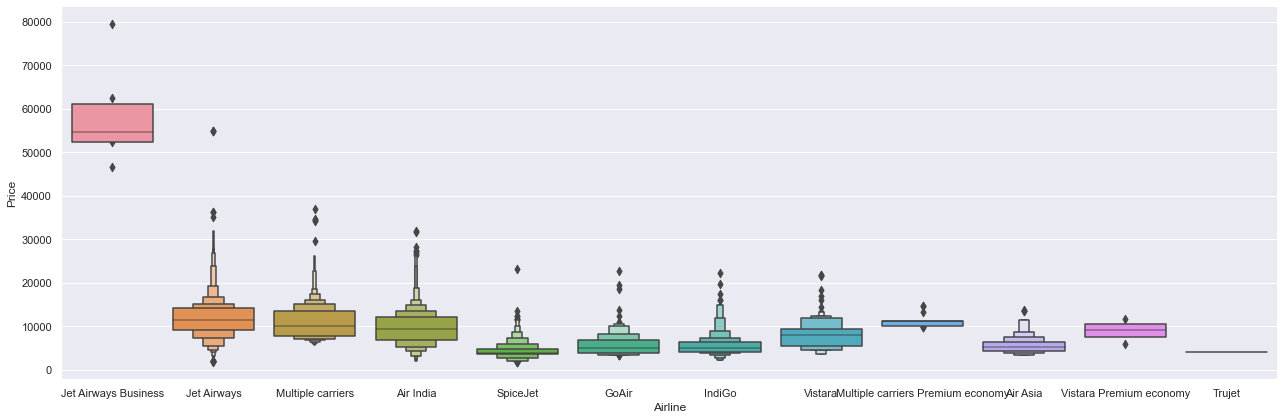

In [37]:
sns.catplot(y="Price",x="Airline",data=train_Data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)                          

In [38]:
##Box plot of Plane typr and the their fare
##Jet airways is giving Highest weightage to the flight fare(Price)

In [39]:
train_Data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

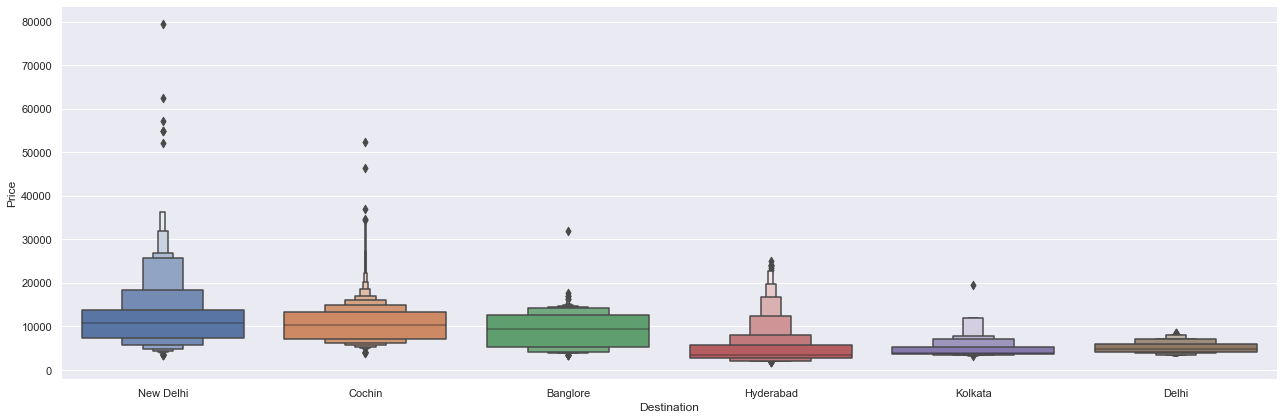

In [40]:
sns.catplot(y="Price",x="Destination",data=train_Data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3) 

In [41]:
### Highest fare flights are from the Mew Delhi

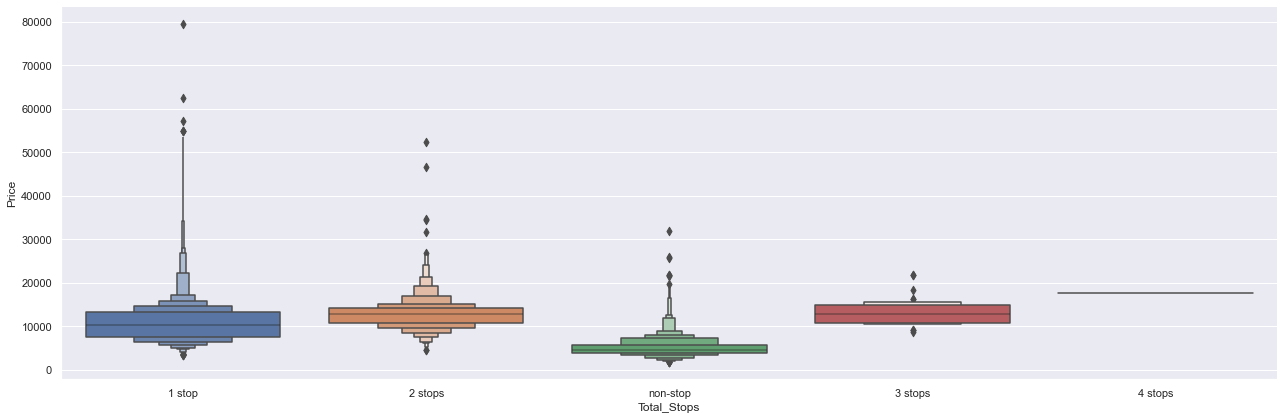

In [42]:

sns.catplot(y="Price",x="Total_Stops",data=train_Data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3) 

In [43]:
##We can see 4 stops are having highest mean fair and Mon stop flights are having loest fare which supposed to come this way

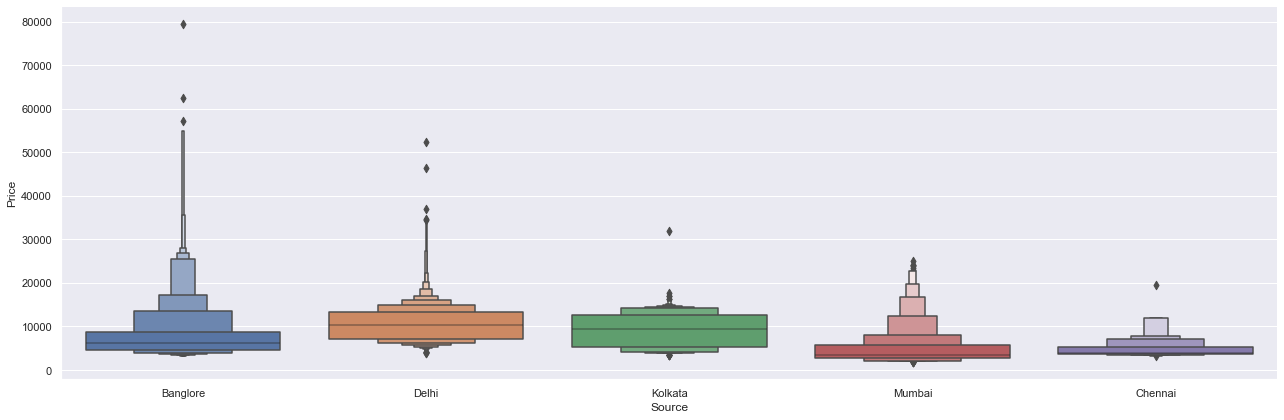

In [44]:

sns.catplot(y="Price",x="Source",data=train_Data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3) 

In [45]:
## Delhi as source is giving highest fare in flight and chennai as source giving lowest fare

  One Hot encoding- for Nominal Data- Airline

In [46]:
Airline=train_Data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True) ## Get_Dummies for one hot encoding
Airline.head()                                  ## drop_first is for as we can drop one airline in one hot encoding

Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   
4                  0              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  
0               0                0                                0  
1               0                0                                0  
2               0                0                                0  
3               0                0                                0  
4               0                0                                0

  One Hot encoding- for Nominal Data- Source

In [47]:
Source=train_Data[["Source"]]
Source=pd.get_dummies(Source,drop_first=True) ## Get_Dummies for one hot encoding
Source.head()                                  ## drop_first is for as we can drop one City(bangloer here in this case) in one hot encoding

Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai
0               0             0               0              0
1               0             0               1              0
2               0             1               0              0
3               0             0               1              0
4               0             0               0              0

  One Hot encoding- for Nominal Data- Destination

In [48]:
Destination=train_Data[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True) ## Get_Dummies for one hot encoding
Destination.head()                                  ## drop_first is for as we can drop one City(bangloer here in this case) in one hot encoding

Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      1

Stops Column Mnaupulation

In [49]:
train_Data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [50]:
##as this is an ordinal categorical data so we can convert them as Label Encoder

In [51]:
##Label Encoding for Total stops as from box plot we have seen from box ploty of price and total stops that
##moere the stops more the price so we can rank them and give them Label encoding instead of one hot encoding

In [52]:
train_Data.replace({"non-stop": 0 , "1 stop" : 1 ,"2 stops": 2 , "3 stops" : 3, "4 stops" : 4},inplace=True)
## Label Encoding given as a dictionary

In [53]:
#Route and Number of stops are giving same information so we can drop it
#Also the additional info volumn also not giving any information we can drop that also.

train_Data.drop(["Route","Additional_Info"] ,axis=1 ,inplace=True)

In [54]:
train_Data.head(2)  ## We have dropped Route and Additional info and converted Total stop as Label Encoding

Airline    Source Destination  Total_Stops  Price  Journey_day  \
0     IndiGo  Banglore   New Delhi            0   3897           24   
1  Air India   Kolkata    Banglore            2   7662            1   

   Journey_Month  Departure_Hour  Departure_Minute  Arrival_Hour  \
0              3              22                20             1   
1              5               5                50            13   

   Arrival_Minute  Duration_hours  Duration_mins  
0              10               2             50  
1              15               7             25

Concatantion of one hot encoded Data
train_Data with Airline , Source and Destination as they Get encode seperately

In [55]:
data_Train=pd.concat([train_Data,Airline,Source,Destination],axis=1)

In [56]:
data_Train.head(2)  ## Data with Encoded columns

Airline    Source Destination  Total_Stops  Price  Journey_day  \
0     IndiGo  Banglore   New Delhi            0   3897           24   
1  Air India   Kolkata    Banglore            2   7662            1   

   Journey_Month  Departure_Hour  Departure_Minute  Arrival_Hour  \
0              3              22                20             1   
1              5               5                50            13   

   Arrival_Minute  Duration_hours  Duration_mins  Airline_Air India  \
0              10               2             50                  0   
1              15               7             25                  1   

   Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0              0               1                    0   
1              0               0                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  \
0               0                0                                0   
1               0                0                                0   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0               0             0               0              0   
1               0             0               1              0   

   Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1  
1                    0                      0

In [57]:
data_Train.shape  ## Encoded data is having more columns here

(10682, 33)

In [58]:
##We can Drop Airline names Sources and Destination column as we have converted them into one hot encoding
data_Train.drop(["Airline","Source","Destination"],axis=1 ,inplace=True)

In [59]:
data_Train.shape  ## Encoded data is having more columns here

(10682, 30)

In [60]:
data_Train.head(2)  ## shape will be now having 30 columns as 3 dropped

Total_Stops  Price  Journey_day  Journey_Month  Departure_Hour  \
0            0   3897           24              3              22   
1            2   7662            1              5               5   

   Departure_Minute  Arrival_Hour  Arrival_Minute  Duration_hours  \
0                20             1              10               2   
1                50            13              15               7   

   Duration_mins  Airline_Air India  Airline_GoAir  Airline_IndiGo  \
0             50                  0              0               1   
1             25                  1              0               0   

   Airline_Jet Airways  Airline_Jet Airways Business  \
0                    0                             0   
1                    0                             0   

   Airline_Multiple carriers  Airline_Multiple carriers Premium economy  \
0                          0                                          0   
1                          0                                          0   

   Airline_SpiceJet  Airline_Trujet  Airline_Vistara  \
0                 0               0                0   
1                 0               0                0   

   Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
0                                0               0             0   
1                                0               0             0   

   Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0               0              0                   0                  0   
1               1              0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0

In [61]:
## We have converted our Train Data set as a model data which can be now used for training purpose but we have
## to do these all the step with test data as well.

##if test and train data is given in combined mode then we can do it once and split at the last using 
##traintest split commant of scikit learn library .

##But if the data is given seperated dont mergee the data just do process seperately. as that can be leads to data 
##leaking means your model will see the test data.

Test Data Wrangling

In [62]:
## in other file as test data wrangling


Loading Wrangled Data from CSV

In [63]:
test_Data=pd.read_csv(r"test_Data.csv")

In [64]:
test_Data.head(2)

Unnamed: 0  Total_Stops  Journey_day  Journey_Month  Departure_Hour  \
0           0            1            6              6              17   
1           1            1           12              5               6   

   Departure_Minute  Arrival_Hour  Arrival_Minute  Duration_hours  \
0                30             4              25              10   
1                20            10              20               4   

   Duration_mins  Airline_Air India  Airline_GoAir  Airline_IndiGo  \
0             55                  0              0               0   
1              0                  0              0               1   

   Airline_Jet Airways  Airline_Jet Airways Business  \
0                    1                             0   
1                    0                             0   

   Airline_Multiple carriers  Airline_Multiple carriers Premium economy  \
0                          0                                          0   
1                          0                                          0   

   Airline_SpiceJet  Airline_Vistara  Airline_Vistara Premium economy  \
0                 0                0                                0   
1                 0                0                                0   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0               0             1               0              0   
1               0             0               1              0   

   Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   1                  0                      0   
1                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      0  
1                    0                      0

In [65]:
test_Data.shape

(2671, 29)

In [66]:
test_Data.size

77459

In [67]:
##We have done Exploratory Data analysis till now for both train and test data
##Now we go and select our features for the input to the model

Features Selection


In [68]:
## we can use various graphs for the feature selection and for seeing the correlation between variables.

In [69]:
data_Train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_Month',
       'Departure_Hour', 'Departure_Minute', 'Arrival_Hour', 'Arrival_Minute',
       'Duration_hours', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [70]:
X=data_Train.loc[:,['Total_Stops',  'Journey_day', 'Journey_Month',
       'Departure_Hour', 'Departure_Minute', 'Arrival_Hour', 'Arrival_Minute',
       'Duration_hours', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

Total_Stops  Journey_day  Journey_Month  Departure_Hour  Departure_Minute  \
0            0           24              3              22                20   
1            2            1              5               5                50   
2            2            9              6               9                25   
3            1           12              5              18                 5   
4            1            1              3              16                50   

   Arrival_Hour  Arrival_Minute  Duration_hours  Duration_mins  \
0             1              10               2             50   
1            13              15               7             25   
2             4              25              19              0   
3            23              30               5             25   
4            21              35               4             45   

   Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   
4                  0              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  \
0               0                0                                0   
1               0                0                                0   
2               0                0                                0   
3               0                0                                0   
4               0                0                                0   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0               0             0               0              0   
1               0             0               1              0   
2               0             1               0              0   
3               0             0               1              0   
4               0             0               0              0   

   Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      1

In [71]:
X.shape   ## column is 29 as price column wont come with feature as these are our labels for supervised learning

(10682, 29)

Dependent Vriable 

In [72]:
Y=data_Train.iloc[:,1]
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

Heat map use to gett the correlation among variable (dependent and independent)

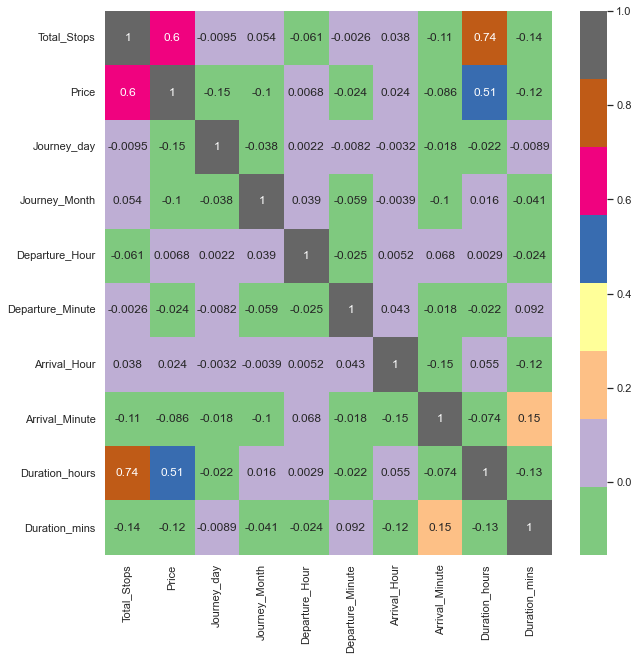

In [73]:
plt.figure(figsize=(10,10))
sns.heatmap(train_Data.corr(),annot=True,cmap="Accent")
plt.show()

In [74]:
## We can se duration hours and total stops are highly correlated which is also obviuos
## We can drop any one these parameter 

Seeing the most important feature fitting decision tree

In [75]:
from sklearn.ensemble import ExtraTreesRegressor ## For finding feature importances
Important_Features=ExtraTreesRegressor()
Important_Features.fit(X,Y)

ExtraTreesRegressor()

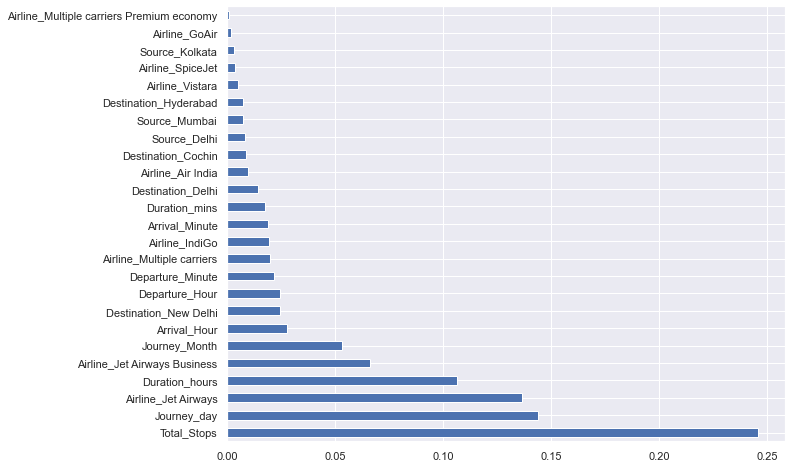

In [76]:
## Bar graph for visualisation
plt.figure(figsize=(10,8))
Imp_Fea=pd.Series(Important_Features.feature_importances_,index=X.columns)
Imp_Fea.nlargest(25).plot(kind='barh')
plt.show()

fitting of model-Random Forest

In [77]:
##We first split the data into train and test data
## if oll conditioning is occuring we can use normalisation of data

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=True)

In [79]:
from sklearn.ensemble import RandomForestRegressor   

In [80]:
Model_fit_Random=RandomForestRegressor() ## Intialising the model

In [81]:
Model_fit_Random.fit(X_train,y_train) ## we can tune hyperparameter also here

RandomForestRegressor()

Predicting the values for test data

In [82]:
y_pred=Model_fit_Random.predict(X_test)

Calculating score for accurecy

In [83]:
Model_fit_Random.score(X_train,y_train)   ## R2 score

0.9537687789602789

In [84]:
Model_fit_Random.score(X_test,y_test)

0.8169146307323804

C:\Users\rahma\miniconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

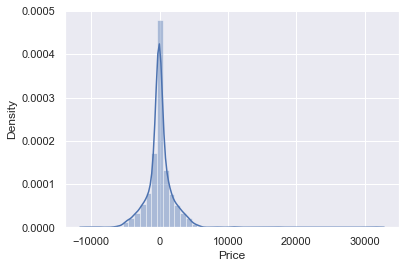

In [85]:
## Plotting the ytest and y pred
sns.distplot(y_test-y_pred)
plt.show

In [86]:
## we can see it is forming a gausian distribution with 0 mean


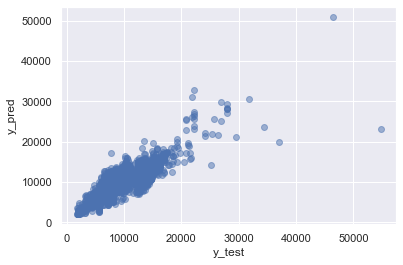

In [87]:
## Scatter plot for y pred and y test 
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [88]:
## We can see this is almost following the straight line

Measuring the errors

In [89]:
from sklearn import metrics

In [90]:
print('Mean squared error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Mean squared error: 3714810.0493200766
Root Mean squared error: 1927.3842505634616


In [97]:
metrics.r2_score(y_test,y_pred)  ## Rsquare 

0.8169146307323804

Hyper parameter tuning

In [98]:
## HPT can be use for improving the result by getting best parameter using randomised searcgh CV  command or grid seasrch cv
## Assign hyperparameter in form of dictinary from which the grid will be form and best point will be choosen


In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [100]:
## Parameter assignment in dictionary

n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=4)]  ## Number of trees
max_features=['auto','sqrt']                                       ## Number of feature to consider qat every split
max_depth=[int(x) for x in np.linspace(5,30,num=4)]              ##Max number of level in trees
min_samples_split=[2,5,10,15]                            ##Min number of sample neded to split the node
min_samples_leaf=[1,2,3,5]                                       ##Min number pf sample needed at each eaf node

Grid Creatiion

In [107]:
grid_random={'n_estimators':n_estimators,
             'max_features' :max_features,
             'max_depth' :max_depth,
             'min_samples_split' :min_samples_split,
             'min_samples_leaf' :min_samples_leaf}

print(grid_random)  #### parameter name shd remain same which are in orange these will go to __init__ thats why

{'n_estimators': [100, 466, 833, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 13, 21, 30], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 3, 5]}


In [108]:
search_randomforest_random=RandomizedSearchCV(estimator=Model_fit_Random,param_distributions=grid_random,scoring='neg_mean_squared_error',n_iter=2,cv=2,verbose=3,random_state=42,n_jobs=1)

In [ ]:
search_randomforest_random.fit(X_train,y_train)  ## here new model will be get trained which we have defined in search CV else error comes

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2] END max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=833;, score=-9804676.261 total time=  49.7s
[CV 2/2] END max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=833;, score=-8352260.043 total time=  51.2s


C:\Users\rahma\miniconda3\envs\myenv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1200;, score=-5887861.441 total time= 6.2min


C:\Users\rahma\miniconda3\envs\myenv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1200;, score=-4822852.780 total time= 7.2min


C:\Users\rahma\miniconda3\envs\myenv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Printing best parameters

In [ ]:
search_randomforest_random.best_params_

In [ ]:
Updated_pred=search_randomforest_random.predict(X_test)

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(y_test-Updated_pred)
plt.show

In [ ]:
##This also looks very normal/Gaussian plot

In [ ]:
## Scatter plot for updated predictions and y test 
plt.scatter(y_test,Updated_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("Updated prediction from CV")
plt.show()

In [ ]:
## We can print the updated errors also to compare with and without CV
print('Mean squared error:',metrics.mean_squared_error(y_test,Updated_pred))
print('Root Mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,Updated_pred)))


In [ ]:
'''''
we can see before error was 
Mean squared error: 3744529.0664047305
Root Mean squared error: 1935.0785685353271

Now error has come down to
Mean squared error: 3702468.2501707603
Root Mean squared error: 1924.179890283328'''''

In [ ]:
#We have done with traininng the model now we can convert it to pickle file to upload on as a appliation where user
#can input their inputs and get the expected flight

Printing of Random forest decision tree

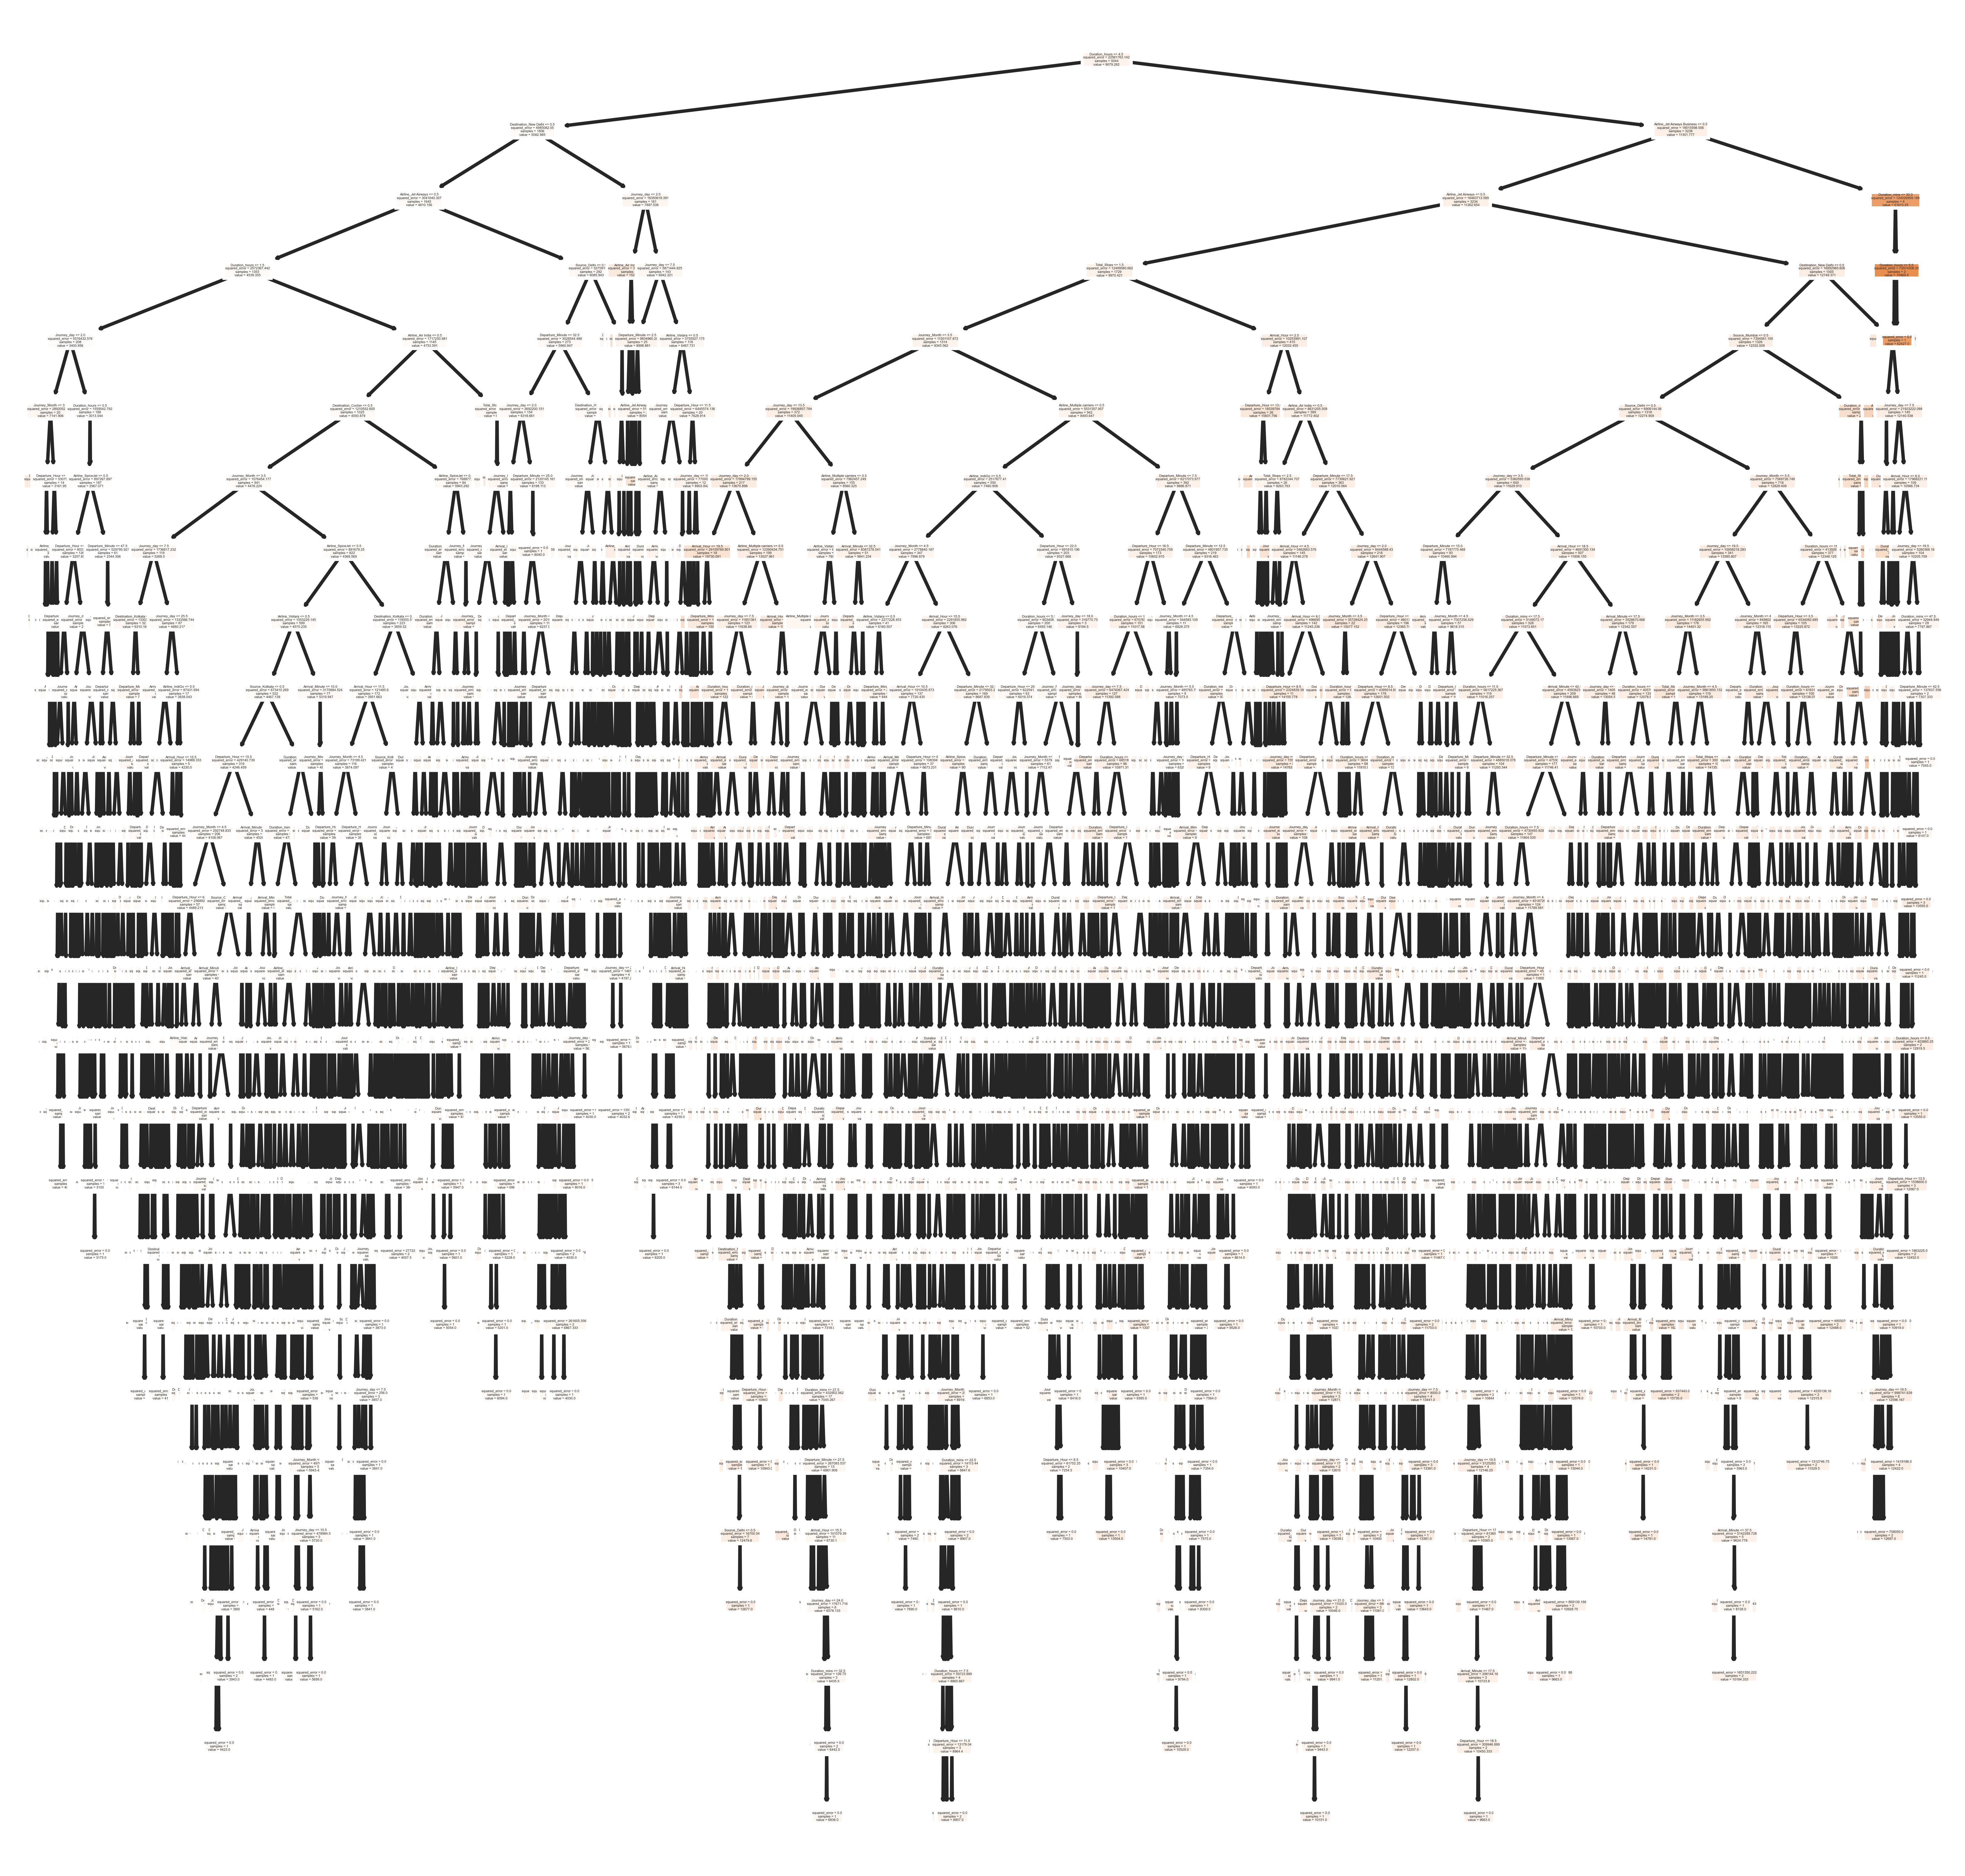

In [157]:
from sklearn import tree
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=800)
tree.plot_tree(Model_fit_Random.estimators_[0],feature_names=X.columns,class_names=Y,filled=True)
fig.savefig('Model_fit_Random_individualtree.png')

Saving of Model to pickle file- It will be a serialized file

In [103]:
import pickle    ## importing the lobrary to save data in serialized form
file=open('flight_fare_pred_randomforest.pkl','wb')  ##File name and write option setting
pickle.dump(Model_fit_Random,file)  ## saving the model in file 

In [104]:
model_fare=open('flight_fare_pred_randomforest.pkl','rb')  ## opening the model
assign_model=pickle.load(model_fare)  ## assigning model 

In [105]:
y_prediction=assign_model.predict(X_test)  ## cross checking for model predictions

In [106]:
metrics.r2_score(y_test,y_prediction)   ## cheching the R2 score

0.8169146307323804